In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('appstore_games.csv')

In [3]:
dfc = df.copy()

In [4]:
dfc = dfc.drop(['URL','Icon URL'], axis = 1)

In [5]:
dfc.columns = ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_Date']

In [6]:
dfc = dfc[pd.notnull(dfc['User_Rating'])]

In [15]:
import datetime

dfc['Release_Date'] = pd.to_datetime(dfc['Release_Date'])
dfc['Current_Version_Date'] = pd.to_datetime(dfc['Current_Version_Date'])

dfc['Update_Gap'] = dfc['Current_Version_Date'] - dfc['Release_Date']

Low_User_Count = (dfc[dfc['User_Rating_Count'] < 200].index) &\
dfc[dfc['Update_Gap'] < datetime.timedelta(days=175)].index

dfc.drop(Low_User_Count, inplace = True)

### Genre Grouping

In [18]:
dfc1 = dfc.copy()
dfc1['Genre'] = dfc1['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
dfc1['Genre'] = dfc1['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
dfc1['Genre']= dfc1['Genre'].str.strip()
Not_Main_Genre = dfc1[~dfc1.Genre.str.contains('Puzzle') &\
                      ~dfc1.Genre.str.contains('Action') &\
                      ~dfc1.Genre.str.contains('Family') &\
                           ~dfc1.Genre.str.contains('Education') &\
                           ~dfc1.Genre.str.contains('Family') &\
                           ~dfc1.Genre.str.contains('Adventure') &\
                           ~dfc1.Genre.str.contains('Board') &\
                           ~dfc1.Genre.str.contains('Role')].index
dfc1.drop(Not_Main_Genre , inplace=True)
dfc1.loc[dfc1['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
dfc1.loc[dfc1['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
dfc1.loc[dfc1['Genre'].str.contains('Action'),'Genre'] = 'Action'
dfc1.loc[dfc1['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
dfc1.loc[dfc1['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
dfc1.loc[dfc1['Genre'].str.contains('Family'),'Genre'] = 'Family'
dfc1.loc[dfc1['Genre'].str.contains('Education'),'Genre'] = 'Family'

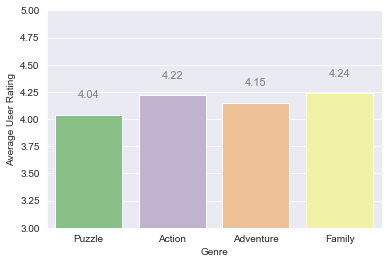

In [19]:
x = ['Puzzle', 'Action', 'Adventure', 'Family']
y = [dfc1['User_Rating'][(dfc1['Genre'] == 'Puzzle')].mean(), dfc1['User_Rating'][(dfc1['Genre'] == 'Action')].mean(), dfc1['User_Rating'][(dfc1['Genre'] == 'Adventure')].mean(), dfc1['User_Rating'][(dfc1['Genre'] == 'Family')].mean()]
visual = sns.barplot(x, y, palette = 'Accent')
visual.set(xlabel = 'Genre', ylabel = 'Average User Rating')
visual.set(ylim = (3,5))
for p in visual.patches:
    visual.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20), textcoords='offset points')

plt.ioff()

### Game Size Analysis

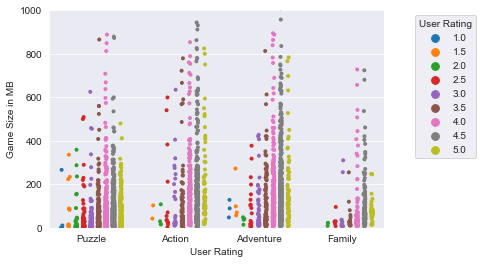

In [21]:
dfc1['Size1'] = round(dfc1['Size']/1000000,1)
Size_Less_250MB = dfc1[dfc1.Size1 <250]
Size_More_250MB = dfc1[(dfc1.Size1 >=250) & (dfc1.Size1 <1000)]
Size_More_1GB = dfc1[dfc1.Size1 >=1000]
visual = sns.stripplot(y='Size1' , x='Genre', data=dfc1, hue='User_Rating',dodge=True, size=4)
plt.legend(title='User Rating', bbox_to_anchor=(1.29, 1))
visual.set(ylim=(0, 1000))
visual.set(xlabel='User Rating', ylabel='Game Size in MB')
plt.ioff()

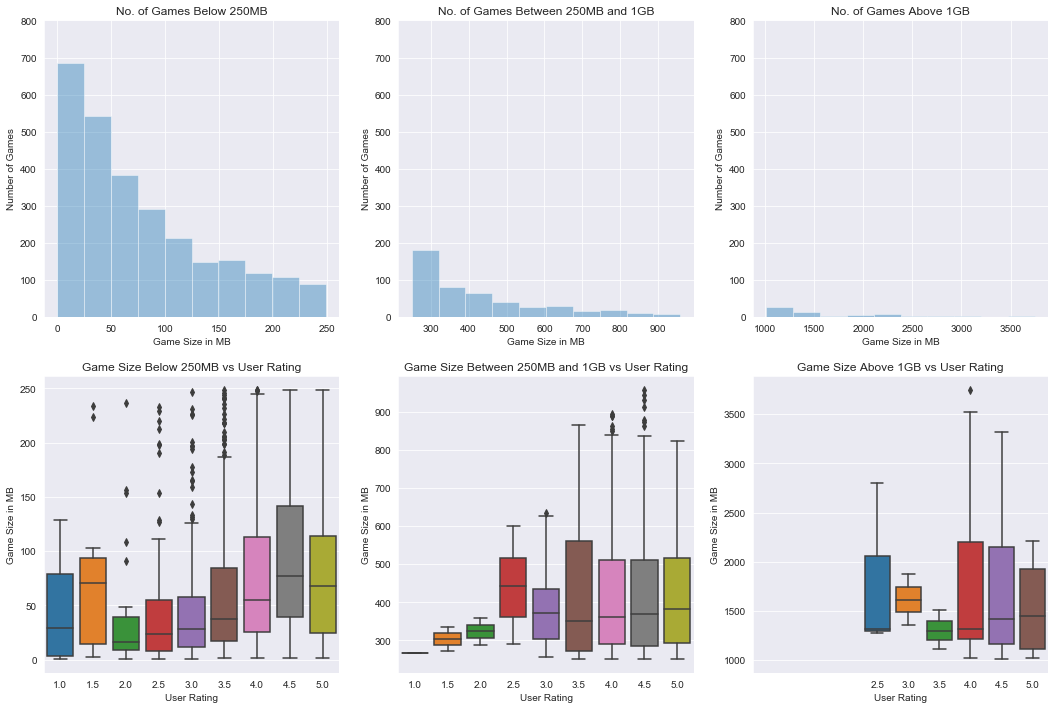

In [24]:
sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))
visual1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size1',  ax=axes[1,0])
visual2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size1', ax=axes[1,1])
visual3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size1', ax=axes[1,2],)
visual4 = sns.distplot(Size_Less_250MB.Size1, bins= 10, kde=False,ax=axes[0,0])
visual5 = sns.distplot(Size_More_250MB.Size1, bins= 10, kde=False,ax=axes[0,1])
visual6 = sns.distplot(Size_More_1GB.Size1, bins= 10, kde=False,ax=axes[0,2])
visual1.set(xlabel='User Rating',ylabel='Game Size in MB')
visual2.set(xlabel='User Rating',ylabel='Game Size in MB')
visual3.set(xlabel='User Rating',ylabel='Game Size in MB')
visual4.set(xlabel='Game Size in MB',ylabel='Number of Games')
visual5.set(xlabel='Game Size in MB',ylabel='Number of Games')
visual6.set(xlabel='Game Size in MB',ylabel='Number of Games')
visual3.set(xlim=(-4, 5.5))
visual4.set(ylim=(0, 800))
visual5.set(ylim=(0, 800))
visual6.set(ylim=(0, 800))
axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Game Size Below 250MB vs User Rating')
axes[1, 1].set_title('Game Size Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Game Size Above 1GB vs User Rating')
plt.ioff()

### Release date / Update date factor

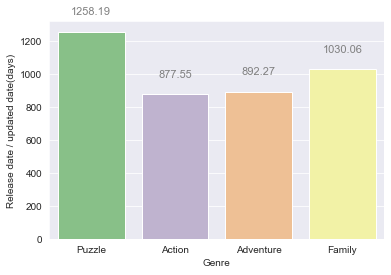

In [26]:
for i in (list(dfc1.index.values)):
    dfc1.Update_Gap[i]= dfc.Update_Gap[i].days
x=['Puzzle','Action','Adventure','Family']
y = [dfc1.Update_Gap[(dfc1['Genre']=='Puzzle')].mean(), dfc1.Update_Gap[(dfc1['Genre']=='Action')].mean(), dfc1.Update_Gap[(dfc1['Genre']=='Adventure')].mean(), dfc1.Update_Gap[(dfc1['Genre']=='Family')].mean()]
visual = sns.barplot(x, y, palette='Accent')
visual.set(xlabel='Genre',ylabel='Release date / updated date(days)')
for p in visual.patches:
    visual.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20), textcoords='offset points')

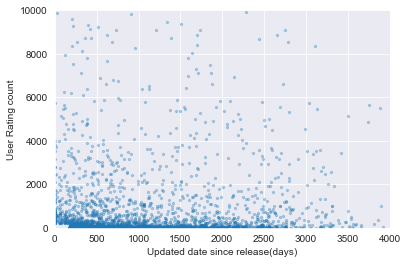

In [28]:
plt.scatter(dfc1['Update_Gap'], dfc1['User_Rating_Count'], alpha=0.3, s=5) 
plt.xlim(0, 4000)
plt.ylim(0, 10000)
plt.xlabel('Updated date since release(days)')
plt.ylabel('User Rating count')
plt.show()

### Game Price and In-App Purchase Factor

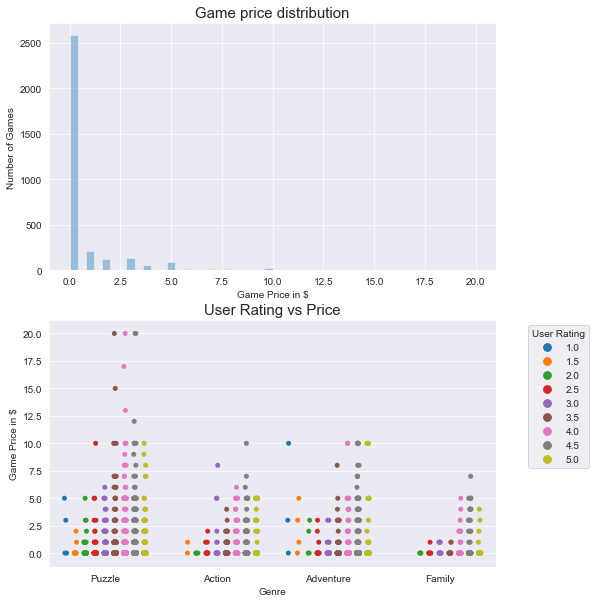

In [29]:
f, axes = plt.subplots (2,1, figsize=(8,10))
vis1 = sns.distplot(dfc1['Price'],kde=None,ax=axes[0])
vis2 = sns.stripplot(y=dfc1['Price'], x=dfc1['Genre'], data=dfc1,ax=axes[1],hue=dfc1['User_Rating'], dodge=1)
vis1.set(xlabel='Game Price in $',ylabel='Number of Games')
vis2.set(xlabel='Genre',ylabel='Game Price in $')
axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating',bbox_to_anchor=(1.22, 1))

plt.ioff()